In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing  import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df=pd.read_csv("ElecDeviceRatingPrediction.csv")
electro = df.copy()
electro.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Pentium Quad,Not Available,4 GB,LPDDR4X,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,45990,3 stars,0,0
1,ASUS,Intel,Core i5,10th,8 GB,LPDDR4,0 GB,512 GB,32-bit DOS,4 GB,Casual,No warranty,No,No,106167,4 stars,1881,241
2,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
3,Lenovo,Intel,Core i3,11th,4 GB,DDR4,256 GB,0 GB,64-bit Windows,0 GB,Casual,1 year,No,Yes,44990,4 stars,42,4
4,HP,AMD,Ryzen 7,Not Available,16 GB,DDR4,512 GB,0 GB,64-bit Windows,2 GB,Casual,1 year,No,Yes,79990,3 stars,23,6


In [200]:
#check the datatypes
electro.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [201]:
electro['ram_gb']=electro['ram_gb'].str.strip('GB')
#electro['ram_gb']=electro['ram_gb'].astype('int')


In [202]:
#electro['ram_type - ram_gb'] = electro['ram_gb'] + electro['ram_type']

In [203]:
#electro['ram_type - ram_gb'].unique()

In [204]:
#electro['ram_type - ram_gb'] = electro['ram_type - ram_gb'].astype('category')

In [205]:
electro.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [206]:
mode_value = electro['processor_gnrtn'].mode()[0]

print(mode_value)

11th


In [207]:
#convert to the correct datatype
electro['Touchscreen']=electro['Touchscreen'].astype('category')
electro['msoffice']=electro['msoffice'].astype('category')
electro['rating']=electro['rating'].str.strip('stars')
electro['rating']=electro['rating'].astype('category')

electro['ram_gb']=electro['ram_gb'].astype('int')
electro['ssd']=electro['ssd'].str.strip('GB')
electro['ssd']=electro['ssd'].astype('int')
electro['hdd']=electro['hdd'].str.strip('GB')
electro['hdd']=electro['hdd'].astype('int')
electro['processor_brand']=electro['processor_brand'].astype('category')
electro['brand']=electro['brand'].astype('category')
electro['processor_name']=electro['processor_name'].astype('category')
electro['ram_type']=electro['ram_type'].astype('category')
electro['os']=electro['os'].astype('category')
electro['weight']=electro['weight'].astype('category')
electro['graphic_card_gb']=electro['graphic_card_gb'].str.strip('GB')
electro['graphic_card_gb']=electro['graphic_card_gb'].astype('int')
electro['warranty']=electro['warranty'].str.strip('year || years')
electro['warranty']=electro['warranty'].str.replace('No warrant','0')
electro['warranty']=electro['warranty'].astype('int')
electro['processor_gnrtn']=electro['processor_gnrtn'].str.replace('Not Available',mode_value)
electro['processor_gnrtn']=electro['processor_gnrtn'].str.strip('th')


In [208]:
electro['processor_gnrtn'].unique()

array(['11', '10', '8', '7', '12', '9', '4'], dtype=object)

In [209]:
electro['ram_type'].unique()

['LPDDR4X', 'LPDDR4', 'DDR4', 'DDR3', 'DDR5', 'LPDDR3']
Categories (6, object): ['DDR3', 'DDR4', 'DDR5', 'LPDDR3', 'LPDDR4', 'LPDDR4X']

In [210]:
#manually encoding ram type
manual_encoding = {}
for category in electro['ram_type'].unique():
    if(category == 'DDR5'):
        manual_encoding[category] = 5
    elif(category == 'LPDDR4X'):
        manual_encoding[category] = 4
    elif(category == 'LPDDR4'):
        manual_encoding[category] = 3
    elif(category == 'DDR4'):
        manual_encoding[category] = 2
    elif(category == 'LPDDR3'):
        manual_encoding[category] = 1
    else:
        manual_encoding[category] = 0

print(manual_encoding)

{'LPDDR4X': 4, 'LPDDR4': 3, 'DDR4': 2, 'DDR3': 0, 'DDR5': 5, 'LPDDR3': 1}


In [211]:
electro['ram_type'] = electro['ram_type'].map(manual_encoding)
electro['ram_type']

0      4
1      3
2      2
3      2
4      2
      ..
718    2
719    2
720    2
721    3
722    2
Name: ram_type, Length: 723, dtype: category
Categories (6, int64): [0, 2, 5, 1, 3, 4]

In [212]:
electro.dtypes

brand                category
processor_brand      category
processor_name       category
processor_gnrtn        object
ram_gb                  int32
ram_type             category
ssd                     int32
hdd                     int32
os                   category
graphic_card_gb         int32
weight               category
warranty                int32
Touchscreen          category
msoffice             category
Price                   int64
rating               category
Number of Ratings       int64
Number of Reviews       int64
dtype: object

In [213]:
electro['processor_gnrtn'].unique()

array(['11', '10', '8', '7', '12', '9', '4'], dtype=object)

In [214]:
electro.loc[electro['processor_gnrtn'] == '0' , 'processor_gnrtn'] = electro['processor_gnrtn'].value_counts().idxmax()
electro['processor_gnrtn']=electro['processor_gnrtn'].astype('int')

In [215]:
electro['processor_gnrtn'].unique()

array([11, 10,  8,  7, 12,  9,  4])

In [216]:
electro['rating'].unique()

['3 ', '4 ', '5 ', '2 ', '1 ']
Categories (5, object): ['1 ', '2 ', '3 ', '4 ', '5 ']

In [217]:
#check the ranges
electro.describe()

,processor_gnrtn,ram_gb,ssd,hdd,graphic_card_gb,warranty,Price,Number of Ratings,Number of Reviews
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,10.535270,8.724758,449.150761,232.984786,1.208852,0.716459,77031.348548,301.217151,36.550484
std,0.863102,4.439221,318.015040,416.286290,2.053125,0.605691,45706.444883,970.519221,115.413126
min,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,16990.000000,0.000000,0.000000
25%,10.000000,4.000000,256.000000,0.000000,0.000000,0.000000,45960.000000,0.000000,0.000000
50%,11.000000,8.000000,512.000000,0.000000,0.000000,1.000000,64990.000000,17.000000,2.000000
75%,11.000000,8.000000,512.000000,512.000000,2.000000,1.000000,89846.000000,154.000000,19.500000
max,12.000000,32.000000,3072.000000,2048.000000,8.000000,3.000000,441990.000000,15279.000000,1947.000000


In [218]:
#check for duplicates
duplicates = electro.duplicated(keep=False)
duplicates.sum()

30

In [219]:
#drop the duplicates
electro.drop_duplicates(inplace=True)

In [220]:
#check if they are deleted
duplicates = electro.duplicated(keep=False).sum()
duplicates

0

In [221]:
#check if there is any device doesn't have any processor
electro[(electro['ssd']==0) & (electro['hdd']==0)]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews


In [222]:
#check missing data
electro.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [223]:
electro.dtypes

brand                category
processor_brand      category
processor_name       category
processor_gnrtn         int32
ram_gb                  int32
ram_type             category
ssd                     int32
hdd                     int32
os                   category
graphic_card_gb         int32
weight               category
warranty                int32
Touchscreen          category
msoffice             category
Price                   int64
rating               category
Number of Ratings       int64
Number of Reviews       int64
dtype: object

In [224]:
#label encoding for features with natural order 
label_encoder = LabelEncoder()  
electro['rating']= label_encoder.fit_transform(electro['rating'])
electro['weight']= label_encoder.fit_transform(electro['weight'])
electro['msoffice'] = label_encoder.fit_transform(electro['msoffice'])


In [225]:
categoricalData = pd.DataFrame()
categoricalData['weight'] = electro['weight']
categoricalData['brand'] = electro['brand']
categoricalData['processor_brand'] = electro['processor_brand']
categoricalData['processor_name'] = electro['processor_name']
categoricalData['os'] = electro['os']
categoricalData['Touchscreen'] = electro['Touchscreen']
categoricalData['msoffice'] = electro['msoffice']
categoricalData['ram_type'] = electro['ram_type']
#one hot encoding
categoricalData = pd.get_dummies(categoricalData,columns=['brand','processor_brand','processor_name','os','Touchscreen'],dtype=int)

In [226]:
#one hot encoding for categories with no order
electro=pd.get_dummies(electro,columns=['brand','processor_brand','processor_name','os','Touchscreen','msoffice'],dtype=int)

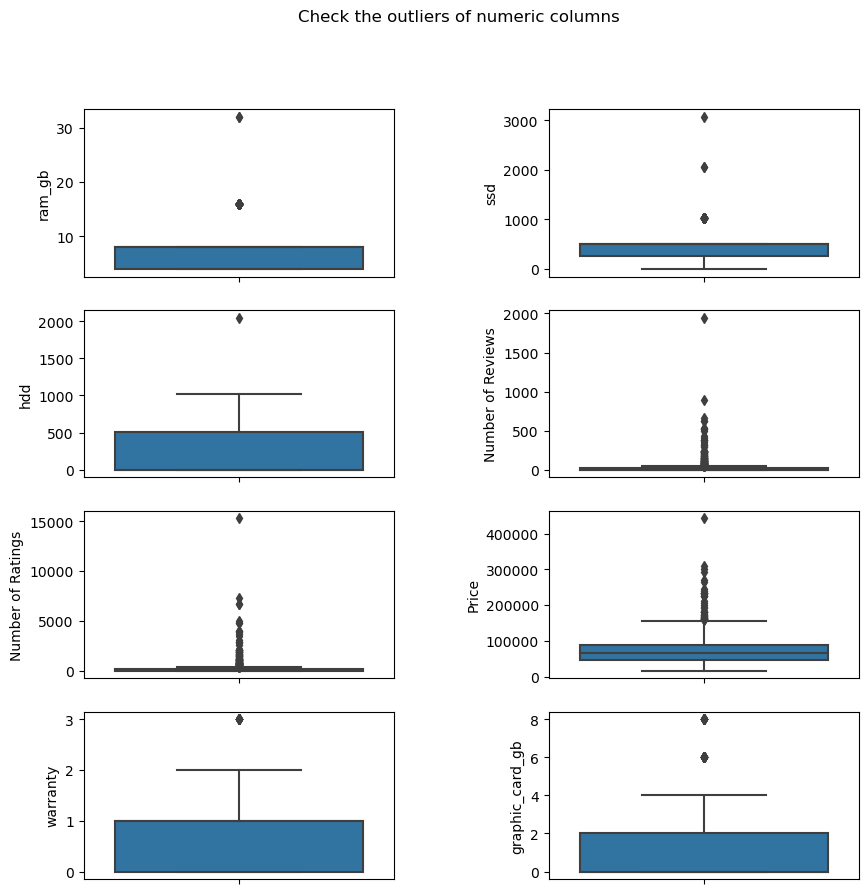

In [227]:
#check the outliers
fig, axes = plt.subplots(4,2,sharex=True,figsize=(10, 10))
fig.suptitle('Check the outliers of numeric columns')
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(data=electro, y='ram_gb', ax=axes[0,0])
sns.boxplot(data=electro, y='ssd', ax=axes[0,1])
sns.boxplot(data=electro, y='hdd', ax=axes[1,0])
sns.boxplot(data=electro, y='Number of Reviews', ax=axes[1,1])
sns.boxplot(data=electro, y='Number of Ratings', ax=axes[2,0])
sns.boxplot(data=electro, y='Price', ax=axes[2,1])
sns.boxplot(data=electro, y='warranty', ax=axes[3,0])
sns.boxplot(data=electro, y='graphic_card_gb', ax=axes[3,1])
plt.show()

In [228]:
#drop the outliers
for col in electro.columns:
        #print("capping the ",col)
        if (((electro[col].dtype)=='float') | ((electro[col].dtype)=='int32')|((electro[col].dtype)=='int64')):
            percentiles = electro[col].quantile([0.25,0.75]).values
            iqr= percentiles[1]-percentiles[0]
            electro[col][electro[col] <= percentiles[0]-1.5*iqr] = percentiles[0]
            electro[col][electro[col] >= percentiles[1]+1.5*iqr] = percentiles[1]
        else:
            electro[col]=electro[col]

C:\Users\DELL\AppData\Local\Temp\ipykernel_5124\1582183839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electro[col][electro[col] <= percentiles[0]-1.5*iqr] = percentiles[0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_5124\1582183839.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electro[col][electro[col] >= percentiles[1]+1.5*iqr] = percentiles[1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_5124\1582183839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

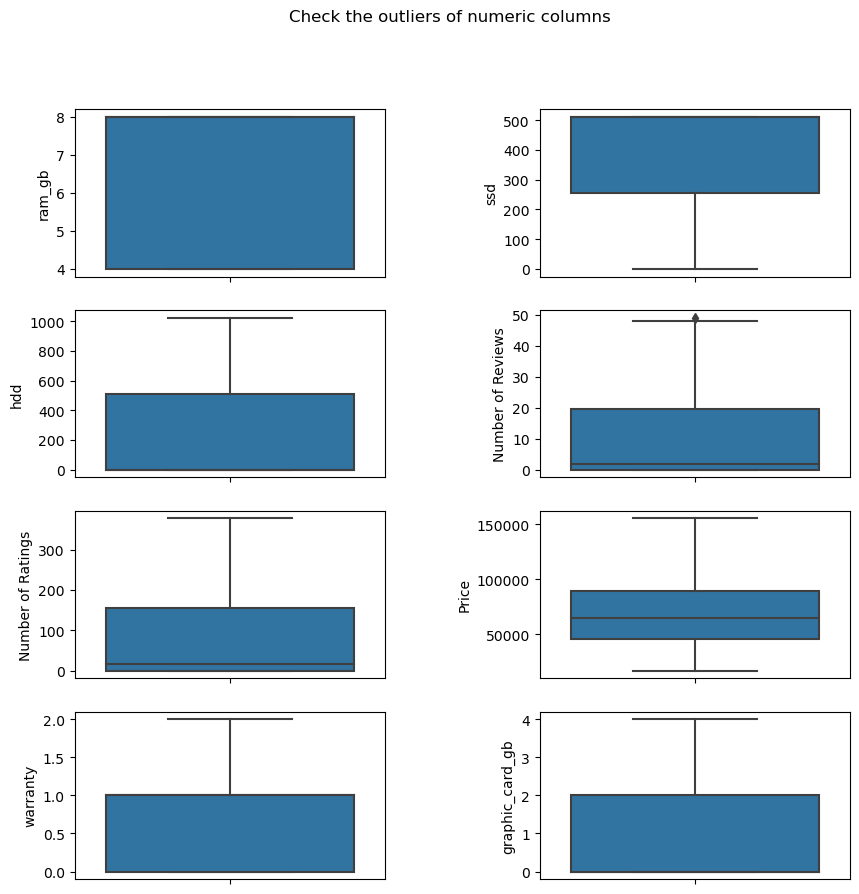

In [229]:
#check the outliers
fig, axes = plt.subplots(4,2,sharex=True,figsize=(10, 10))
fig.suptitle('Check the outliers of numeric columns')
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(data=electro, y='ram_gb', ax=axes[0,0])
sns.boxplot(data=electro, y='ssd', ax=axes[0,1])
sns.boxplot(data=electro, y='hdd', ax=axes[1,0])
sns.boxplot(data=electro, y='Number of Reviews', ax=axes[1,1])
sns.boxplot(data=electro, y='Number of Ratings', ax=axes[2,0])
sns.boxplot(data=electro, y='Price', ax=axes[2,1])
sns.boxplot(data=electro, y='warranty', ax=axes[3,0])
sns.boxplot(data=electro, y='graphic_card_gb', ax=axes[3,1])
plt.show()

In [230]:
electro

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,graphic_card_gb,weight,warranty,Price,rating,...,processor_name_Ryzen 9,os_32-bit DOS,os_32-bit Windows,os_64-bit DOS,os_64-bit Mac,os_64-bit Windows,Touchscreen_No,Touchscreen_Yes,msoffice_0,msoffice_1
0,11,4,4,0,512,0,0,0,45990,2,...,0,0,0,0,0,1,1,0,1,0
1,10,8,3,0,512,4,0,0,106167,3,...,0,0,0,0,0,1,1,0,1,0
2,11,4,2,0,512,0,0,0,22990,2,...,0,0,0,0,0,1,1,0,1,0
3,11,4,2,256,0,0,0,1,44990,3,...,0,0,0,0,0,1,1,0,0,1
4,11,8,2,512,0,2,0,1,79990,2,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,11,4,2,256,0,0,0,0,39998,3,...,0,0,0,0,0,1,1,0,1,0
719,11,8,2,512,0,0,2,0,44990,2,...,0,0,0,0,0,1,1,0,1,0
720,11,8,2,512,0,0,0,1,64990,3,...,0,0,0,0,0,1,1,0,0,1
721,10,8,3,0,512,2,0,0,89918,3,...,0,0,0,0,0,1,1,0,1,0


In [231]:
#electro['rating'] = np.log(electro['rating'])

In [232]:
Y_categorical = electro['rating']
scaler =  MinMaxScaler(feature_range=(0,1))
X= pd.DataFrame(scaler.fit_transform(X),index=X.index,columns= X.columns)
#electro = pd.DataFrame(scaler.fit_transform(electro),index=electro.index,columns= electro.columns)

In [233]:
electro.head()

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,graphic_card_gb,weight,warranty,Price,rating,...,processor_name_Ryzen 9,os_32-bit DOS,os_32-bit Windows,os_64-bit DOS,os_64-bit Mac,os_64-bit Windows,Touchscreen_No,Touchscreen_Yes,msoffice_0,msoffice_1
0,11,4,4,0,512,0,0,0,45990,2,...,0,0,0,0,0,1,1,0,1,0
1,10,8,3,0,512,4,0,0,106167,3,...,0,0,0,0,0,1,1,0,1,0
2,11,4,2,0,512,0,0,0,22990,2,...,0,0,0,0,0,1,1,0,1,0
3,11,4,2,256,0,0,0,1,44990,3,...,0,0,0,0,0,1,1,0,0,1
4,11,8,2,512,0,2,0,1,79990,2,...,0,0,0,0,0,1,1,0,0,1


In [234]:
#split to features and result
X = electro.drop(columns=['rating'])
Y = electro['rating']

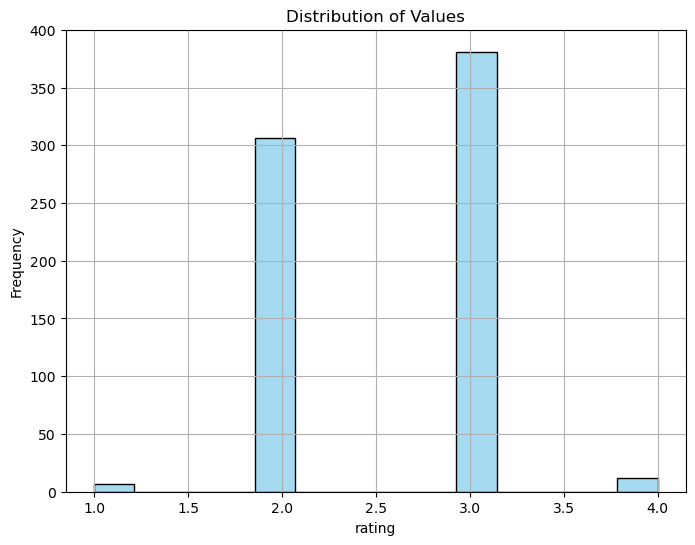

In [235]:
# Plotting 
plt.figure(figsize=(8, 6))
sns.histplot(data=electro, x='rating', color='skyblue', edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

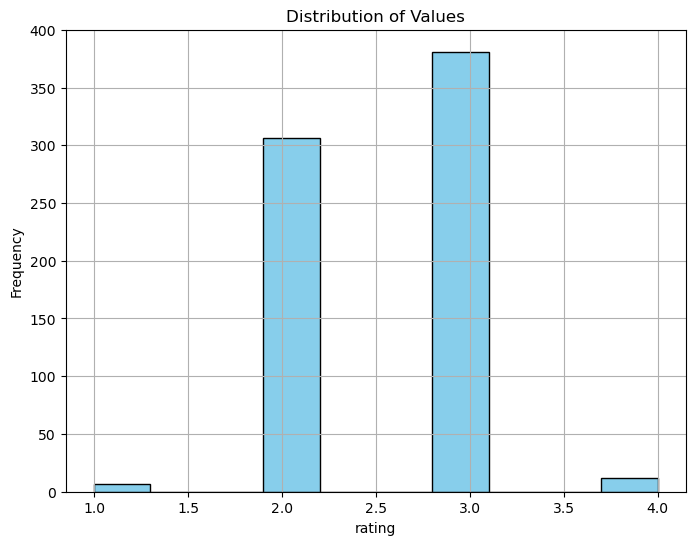

In [236]:
plt.figure(figsize=(8, 6))
plt.hist(electro['rating'],color='skyblue', edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [237]:
electro['rating'].unique()

array([2, 3, 4, 1])

In [238]:
X

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,graphic_card_gb,weight,warranty,Price,Number of Ratings,...,processor_name_Ryzen 9,os_32-bit DOS,os_32-bit Windows,os_64-bit DOS,os_64-bit Mac,os_64-bit Windows,Touchscreen_No,Touchscreen_Yes,msoffice_0,msoffice_1
0,11,4,4,0,512,0,0,0,45990,0.0,...,0,0,0,0,0,1,1,0,1,0
1,10,8,3,0,512,4,0,0,106167,154.5,...,0,0,0,0,0,1,1,0,1,0
2,11,4,2,0,512,0,0,0,22990,0.0,...,0,0,0,0,0,1,1,0,1,0
3,11,4,2,256,0,0,0,1,44990,42.0,...,0,0,0,0,0,1,1,0,0,1
4,11,8,2,512,0,2,0,1,79990,23.0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,11,4,2,256,0,0,0,0,39998,10.0,...,0,0,0,0,0,1,1,0,1,0
719,11,8,2,512,0,0,2,0,44990,0.0,...,0,0,0,0,0,1,1,0,1,0
720,11,8,2,512,0,0,0,1,64990,48.0,...,0,0,0,0,0,1,1,0,0,1
721,10,8,3,0,512,2,0,0,89918,24.0,...,0,0,0,0,0,1,1,0,1,0


C:\Users\DELL\AppData\Local\Temp\ipykernel_5124\3569436995.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = electro.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

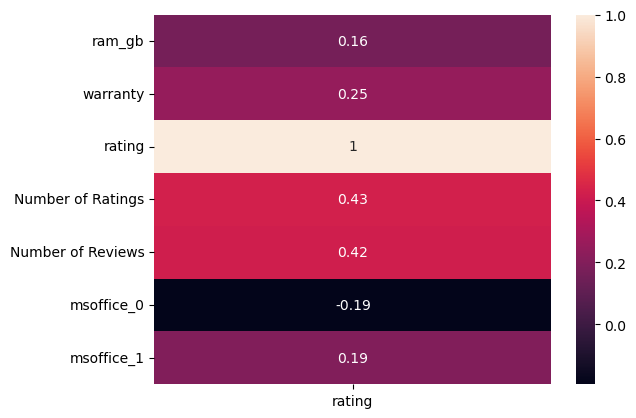

In [239]:
#check the best features with Y
corr = electro.corr()
top_feature = corr.loc[abs(corr['rating'])>0.15,'rating']
top_feature=pd.DataFrame(top_feature)
sns.heatmap(top_feature,annot=True)
plt.show


In [240]:
top_feature

,rating
ram_gb,0.164825
warranty,0.253623
rating,1.000000
Number of Ratings,0.430577
Number of Reviews,0.419867
msoffice_0,-0.193959
msoffice_1,0.193959


In [241]:

Y=electro['rating']
#first_X.pop('msoffice_No')
#first_X.pop('rating')
top_feature = top_feature.drop('rating')

#top_feature
first_X= X[top_feature.index]
#first_X['brand_APPLE'] = X['brand_APPLE']
#first_X['os_32-bit Windows'] = X['os_32-bit Windows']

In [242]:
#normalize the data
#scaler =  MinMaxScaler(feature_range=(0,1))
#first_X= pd.DataFrame(scaler.fit_transform(first_X),index=first_X.index,columns=first_X.columns)


In [243]:
first_X

,ram_gb,warranty,Number of Ratings,Number of Reviews,msoffice_0,msoffice_1
0,4,0,0.0,0.00,1,0
1,8,0,154.5,19.75,1,0
2,4,0,0.0,0.00,1,0
3,4,1,42.0,4.00,0,1
4,8,1,23.0,6.00,0,1
...,...,...,...,...,...,...
718,4,0,10.0,1.00,1,0
719,8,0,0.0,0.00,1,0
720,8,1,48.0,12.00,0,1
721,8,0,24.0,5.00,1,0


In [244]:
best_features = SelectKBest(score_func=chi2, k=3)
fit = best_features.fit(categoricalData, Y_categorical)

# Summarize scores
chi_scores = pd.DataFrame(fit.scores_, columns=["Chi-Square Score"])
columns = pd.DataFrame(categoricalData.columns, columns=["Feature"])
chi_summary = pd.concat([columns, chi_scores], axis=1)

print("Chi-Square scores:\n", chi_summary)

Chi-Square scores:
                         Feature  Chi-Square Score
0                        weight          9.470962
1                      msoffice         18.603335
2                      ram_type          1.780788
3                   brand_APPLE         16.388648
4                    brand_ASUS          4.448450
5                   brand_Avita          7.843137
6                    brand_DELL          0.646671
7                      brand_HP          4.313418
8                  brand_Lenovo          4.659740
9                     brand_MSI          5.333311
10                   brand_acer          1.317812
11          processor_brand_AMD          2.723269
12        processor_brand_Intel          1.874777
13           processor_brand_M1         14.365061
14  processor_name_Celeron Dual          9.965492
15       processor_name_Core i3          1.921731
16       processor_name_Core i5          2.026043
17       processor_name_Core i7          7.653688
18       processor_name_Core i

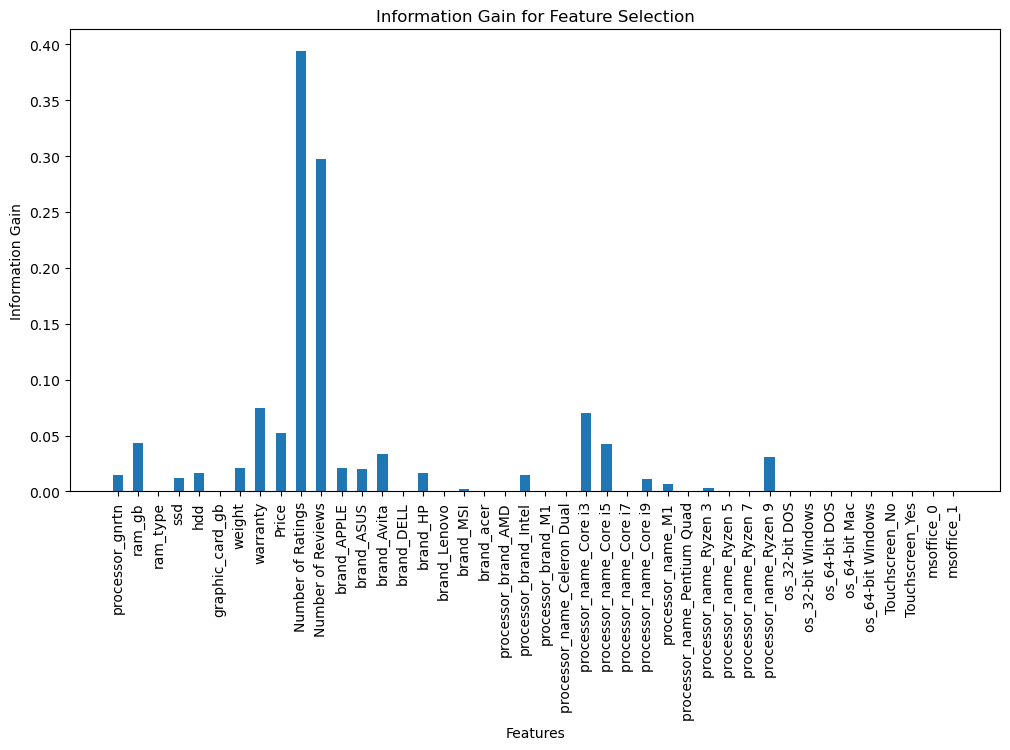

                   Information Gain
Number of Ratings          0.393658
Number of Reviews          0.297699


,Number of Ratings,Number of Reviews
0,0.0,0.00
1,154.5,19.75
2,0.0,0.00
3,42.0,4.00
4,23.0,6.00
...,...,...
718,10.0,1.00
719,0.0,0.00
720,48.0,12.00
721,24.0,5.00


In [245]:
from sklearn.feature_selection import mutual_info_regression

# Calculate information gain for each feature
info_gain = mutual_info_regression(X, Y)

# Select features with information gain greater than 0.15
top_feature_idx = np.where(info_gain > 0.15)[0]
top_feature_names = X.columns[top_feature_idx]
top_feature_df = pd.DataFrame(data=info_gain[top_feature_idx], index=top_feature_names, columns=['Information Gain'])

plt.figure(figsize=(12, 6))
#plt.barh(X.columns, info_gain, color='skyblue', height=0.6)
plt.bar(X.columns, info_gain,width=0.5)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Information Gain for Feature Selection')
plt.show()
print(top_feature_df)
third_feature_selection = X[top_feature_df.index]
third_feature_selection

In [246]:
#linear regression model
X_train, X_test, y_train, y_test = train_test_split(first_X, Y, test_size=0.15, random_state= 130, shuffle = True)



model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Squared Error of train:", mse_train)

print("R^2 Score:", r2)

cv_mse = -cross_val_score(model, first_X, Y, cv=10, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error:", cv_mse.mean())

cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model, first_X, Y, 
                         cv=cv)

print("Accuracy : " ,scores.mean())


Mean Squared Error: 0.17036922483135827
Mean Squared Error of train: 0.23024996050021596
R^2 Score: 0.3558988525554707
Cross-Validation Mean Squared Error: 0.22487571601873263
Accuracy :  0.24943858947412928


In [247]:
#ridge regression model
model = Ridge(alpha=10)
model.fit(X_train, y_train)
y_ridge = model.predict(X_test)
y_ridge_train = model.predict(X_train)
mse_ridge = mean_squared_error(y_test, y_ridge)
mse_ridge_train = mean_squared_error(y_train, y_ridge_train)

r2_ridge = r2_score(y_test, y_ridge)


print("Mean Squared Error:", mse_ridge)
print("Mean Squared Error of train:", mse_ridge_train)
print("R^2 Score:", r2_ridge)

cv_mse_ridge = -cross_val_score(model, first_X, Y, cv=10, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error:", cv_mse_ridge.mean())

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, first_X, Y, 
                         cv=cv)

print("Accuracy : " ,scores.mean())


Mean Squared Error: 0.17040400557543964
Mean Squared Error of train: 0.2302732112027483
R^2 Score: 0.3557673598096772
Cross-Validation Mean Squared Error: 0.22481891628938092
Accuracy :  0.24972328540218283


In [248]:
#lasso regression model
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)
y_lasso = model.predict(X_test)
y_lasso_train = model.predict(X_train)

mse_lasso = mean_squared_error(y_test, y_lasso)
mse_lasso_train = mean_squared_error(y_train, y_lasso_train)

r2_lasso = r2_score(y_test, y_lasso)


print("Mean Squared Error:", mse_lasso)
print("Mean Squared Error of train:", mse_lasso_train)
print("R^2 Score:", r2_lasso)

cv_mse_lasso = -cross_val_score(model, first_X, Y, cv=10, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error:", cv_mse_lasso.mean())

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, first_X, Y, 
                         cv=cv)

print("Accuracy : " ,scores.mean())

Mean Squared Error: 0.1703665541443857
Mean Squared Error of train: 0.23025562858157286
R^2 Score: 0.35590894940568063
Cross-Validation Mean Squared Error: 0.22487895767777308
Accuracy :  0.24939577214014821


In [249]:
#polynomial regression
polynomial_features = PolynomialFeatures(degree=2)
first_X_poly = polynomial_features.fit_transform(X_train)
first_X_poly_test = polynomial_features.fit_transform(X_test)


# Model
model = LinearRegression()
model.fit(first_X_poly, y_train)
y_poly_pred = model.predict(first_X_poly_test)
y_poly_train = model.predict(first_X_poly)
mse_poly = mean_squared_error(y_test, y_poly_pred)
mse_poly_train = mean_squared_error(y_train, y_poly_train)

r2_poly = r2_score(y_test, y_poly_pred)


print("Mean Squared Error:", mse_poly)
print("Mean Squared Error of train:", mse_poly_train)
print("R^2 Score:", r2_lasso)

cv_mse_poly = -cross_val_score(model, first_X, Y, cv=10, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error:", cv_mse_poly.mean())

cv_poly = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, first_X, Y, 
                         cv=cv_poly)

print("Accuracy : " ,scores.mean())

Mean Squared Error: 0.17150118446813514
Mean Squared Error of train: 0.20349804953757247
R^2 Score: 0.35590894940568063
Cross-Validation Mean Squared Error: 0.22487571601873263
Accuracy :  0.24943858947412928


In [255]:
#logistic
model = LogisticRegression(max_iter = 900)
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test) 
y_pred_train_log = model.predict(X_train)
#mse = mean_squared_error(y_test, y_pred)
#mse_train = mean_squared_error(y_train, y_pred_train)
#r2 = r2_score(y_test, y_pred)
#print("Mean Squared Error:", mse)
#print("Mean Squared Error of train:", mse_train)

#print("R^2 Score:", r2)

#cv_mse = -cross_val_score(model, first_X, Y, cv=10, scoring='neg_mean_squared_error')
#print("Cross-Validation Mean Squared Error:", cv_mse.mean())

accuracy = accuracy_score(y_test, y_pred_log)
accuracy_train = accuracy_score(y_train, y_pred_train_log)

print("Acuuracy :", accuracy)
print("Acuuracy train :", accuracy_train)


cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model, first_X, Y, 
                         cv=cv)

print("Accuracy : " ,scores.mean())


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Acuuracy : 0.7735849056603774
Acuuracy train : 0.7616666666666667


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Accuracy :  0.7731187122736418


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
